In [83]:
import tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Loading the dataset and performing EDA:**

In [84]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (50000, 32, 32, 3)
X_test.shape: (10000, 32, 32, 3)
y_train.shape: (50000, 1)
y_test.shape: (10000, 1)


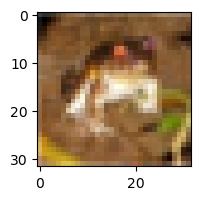

In [85]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])

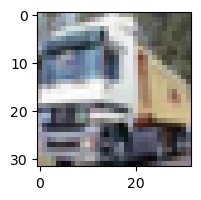

In [86]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1])

In [87]:
classes, counts = np.unique(y_train, return_counts=True)
classes, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**The CIFAR10 dataset has a total of 60,000 samples split across training and test sets. The training dataset has 50,000 images where each image is a 32x32 dimensional matrix with 3 colour channels (RGB). The testing dataset has 10,000 samples of images. The output classes range from 0-9. The dataset is balanced with equal number of samples (5000) for each of the classes.**

In [88]:
# Normalizing the dataset 
X_train = X_train / 255
X_test = X_test / 255
print("Normalized datasets: ", X_train, X_test)

Normalized datasets:  [[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.545098

**Splitting the dataset into training, validation and test datasets:**

Training Dataset = Random 20% of samples from X_train,
Validation Set = 50% of test set,
Test Set = Remaining 50% of test set

In [89]:
# Randomly sampling 20% of this dataset for training purpose
from sklearn.model_selection import train_test_split
X_train_random, _ , y_train_random, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=1)
print(f"X_train_random.shape: {X_train_random.shape}, y_train_random.shape: {y_train_random.shape}")

# Creating validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
print(f"X_validation.shape: {X_validation.shape}, y_validation.shape: {y_validation.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X_train_random.shape: (10000, 32, 32, 3), y_train_random.shape: (10000, 1)
X_validation.shape: (5000, 32, 32, 3), y_validation.shape: (5000, 1)
X_test.shape: (5000, 32, 32, 3), y_test.shape: (5000, 1)


**Building the Multilayer Perceptron:**

In [90]:
mlp = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(512, activation='sigmoid'),
        layers.Dense(512, activation='sigmoid'),
        layers.Dense(10, activation='sigmoid')
    ])

mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

fit_res_mlp1 = mlp.fit(X_train_random, y_train_random, epochs=5, validation_data=(X_validation, y_validation))

Epoch 1/5
313/313 [==============================] - 3s 7ms/step - loss: 2.0646 - accuracy: 0.2316 - val_loss: 2.0134 - val_accuracy: 0.2596
Epoch 2/5
313/313 [==============================] - 2s 7ms/step - loss: 1.9209 - accuracy: 0.2997 - val_loss: 1.8516 - val_accuracy: 0.3242
Epoch 3/5
313/313 [==============================] - 2s 7ms/step - loss: 1.8530 - accuracy: 0.3237 - val_loss: 1.8742 - val_accuracy: 0.3242
Epoch 4/5
313/313 [==============================] - 2s 7ms/step - loss: 1.8146 - accuracy: 0.3355 - val_loss: 1.8626 - val_accuracy: 0.3182
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 1.7788 - accuracy: 0.3546 - val_loss: 1.7555 - val_accuracy: 0.3720


**Plot of Training and Validation Curves:** 

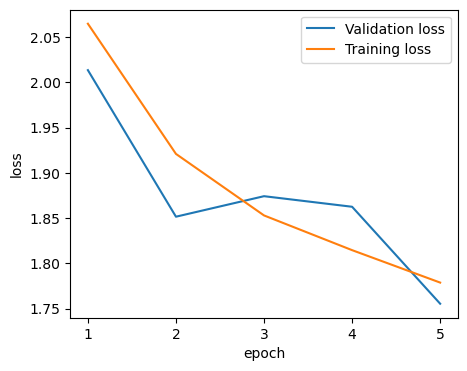

In [91]:
plt.figure(figsize=(5,4))
plt.plot(np.arange(1,6), fit_res_mlp1.history['val_loss'], label="Validation loss")
plt.plot(np.arange(1,6), fit_res_mlp1.history['loss'], label="Training loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(np.arange(1,6))
plt.legend()
plt.show()

In [92]:
print("Accuracy of MLP:", mlp.evaluate(X_test, y_test))

157/157 [==============================] - 0s 2ms/step - loss: 1.7679 - accuracy: 0.3678
Accuracy of MLP: [1.7678916454315186, 0.3677999973297119]


In [93]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = mlp.predict(X_test)

y_pred_classes = []

for element in y_pred:
    y_pred_classes.append(np.argmax(element))
    
print("Accuracy score: ", accuracy_score(y_test, y_pred_classes))
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

157/157 [==============================] - 0s 1ms/step
Accuracy score:  0.3678
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.49      0.44       525
           1       0.40      0.49      0.44       492
           2       0.26      0.18      0.21       491
           3       0.24      0.44      0.31       491
           4       0.45      0.15      0.22       530
           5       0.58      0.13      0.21       489
           6       0.42      0.34      0.38       505
           7       0.35      0.50      0.41       484
           8       0.49      0.37      0.43       500
           9       0.38      0.60      0.46       493

    accuracy                           0.37      5000
   macro avg       0.40      0.37      0.35      5000
weighted avg       0.40      0.37      0.35      5000



**Confusion Matrix for MLP:**

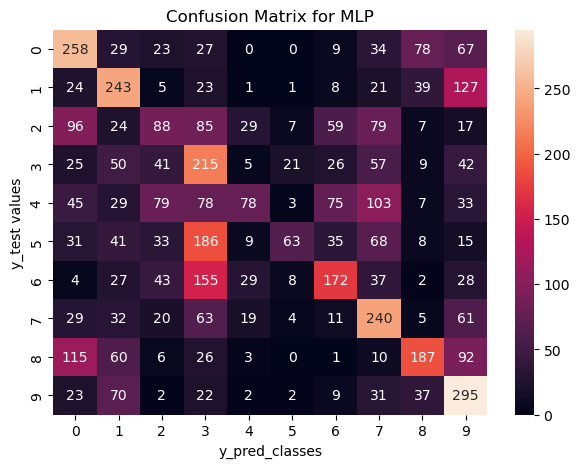

In [94]:
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for MLP')
plt.xlabel('y_pred_classes')
plt.ylabel('y_test values')
plt.show()

**Building the CNN1 network:**

In [95]:
cnn1 = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid')
])

cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fit_res_cnn1 = cnn1.fit(X_train_random, y_train_random, batch_size=32, epochs=5, validation_data=(X_validation, y_validation))

Epoch 1/5
313/313 [==============================] - 37s 118ms/step - loss: 1.8189 - accuracy: 0.3315 - val_loss: 1.5141 - val_accuracy: 0.4498
Epoch 2/5
313/313 [==============================] - 36s 116ms/step - loss: 1.3793 - accuracy: 0.4991 - val_loss: 1.3693 - val_accuracy: 0.5040
Epoch 3/5
313/313 [==============================] - 36s 116ms/step - loss: 1.0624 - accuracy: 0.6221 - val_loss: 1.3765 - val_accuracy: 0.5294
Epoch 4/5
313/313 [==============================] - 37s 117ms/step - loss: 0.6495 - accuracy: 0.7794 - val_loss: 1.3857 - val_accuracy: 0.5412
Epoch 5/5
313/313 [==============================] - 37s 118ms/step - loss: 0.2493 - accuracy: 0.9291 - val_loss: 1.5300 - val_accuracy: 0.5536


**Plot of Train Loss vs Validation Loss for CNN1:**

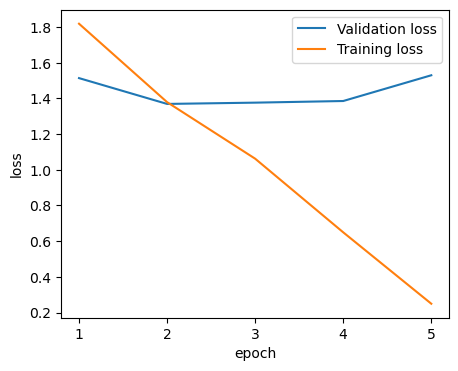

In [96]:
plt.figure(figsize=(5,4))
plt.plot(np.arange(1,6), fit_res_cnn1.history['val_loss'], label="Validation loss")
plt.plot(np.arange(1,6), fit_res_cnn1.history['loss'], label="Training loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(np.arange(1,6))
plt.legend()
plt.show()

In [97]:
print("Accuracy of CNN1:", cnn1.evaluate(X_test, y_test))

157/157 [==============================] - 2s 14ms/step - loss: 1.5528 - accuracy: 0.5476
Accuracy of CNN1: [1.5528053045272827, 0.5475999712944031]


In [98]:
y_pred_cnn1 = cnn1.predict(X_test)

# Determine the classes
y_pred_cnn1_classes = []

for element in y_pred_cnn1:
    y_pred_cnn1_classes.append(np.argmax(element))
    
print("Accuracy score of CNN1: ", accuracy_score(y_test, y_pred_cnn1_classes))
print("Classification Report of CNN1: \n", classification_report(y_test, y_pred_cnn1_classes))

157/157 [==============================] - 2s 13ms/step
Accuracy score of CNN1:  0.5476
Classification Report of CNN1: 
               precision    recall  f1-score   support

           0       0.59      0.56      0.57       525
           1       0.69      0.71      0.70       492
           2       0.40      0.44      0.42       491
           3       0.42      0.30      0.35       491
           4       0.45      0.48      0.46       530
           5       0.42      0.53      0.47       489
           6       0.68      0.55      0.61       505
           7       0.67      0.57      0.62       484
           8       0.59      0.76      0.67       500
           9       0.62      0.58      0.60       493

    accuracy                           0.55      5000
   macro avg       0.55      0.55      0.55      5000
weighted avg       0.55      0.55      0.55      5000



**Confusion Matrix for CNN1:**

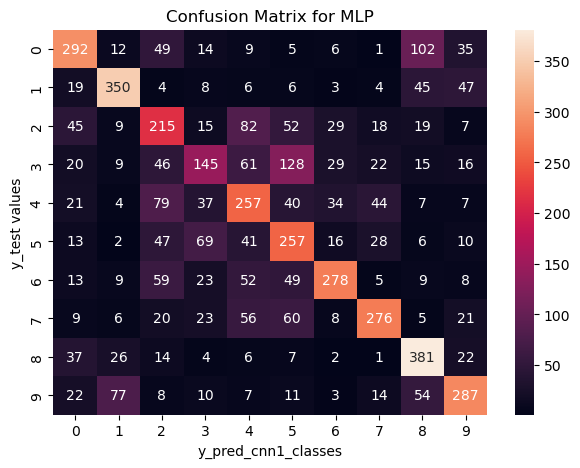

In [99]:
cm_cnn1 = confusion_matrix(y_test, y_pred_cnn1_classes)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_cnn1, annot=True, fmt='d')
plt.title('Confusion Matrix for MLP')
plt.xlabel('y_pred_cnn1_classes')
plt.ylabel('y_test values')
plt.show()

**Building the CNN-2 network:**

In [100]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='sigmoid')
])

cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fit_res_cnn2 = cnn2.fit(X_train_random, y_train_random, batch_size=32, epochs=5, validation_data=(X_validation, y_validation))

Epoch 1/5
313/313 [==============================] - 6s 17ms/step - loss: 1.9719 - accuracy: 0.2584 - val_loss: 1.6932 - val_accuracy: 0.3604
Epoch 2/5
313/313 [==============================] - 5s 16ms/step - loss: 1.6083 - accuracy: 0.4108 - val_loss: 1.5304 - val_accuracy: 0.4400
Epoch 3/5
313/313 [==============================] - 5s 17ms/step - loss: 1.4692 - accuracy: 0.4614 - val_loss: 1.3907 - val_accuracy: 0.4916
Epoch 4/5
313/313 [==============================] - 6s 18ms/step - loss: 1.3317 - accuracy: 0.5118 - val_loss: 1.2810 - val_accuracy: 0.5304
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 1.2183 - accuracy: 0.5612 - val_loss: 1.2866 - val_accuracy: 0.5302


**Plot of Train vs Validation Loss for CNN-2:**

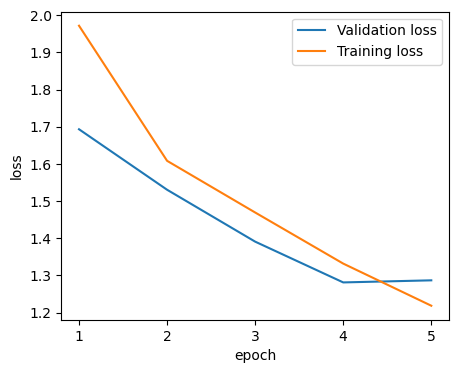

In [101]:
plt.figure(figsize=(5,4))
plt.plot(np.arange(1,6), fit_res_cnn2.history['val_loss'], label="Validation loss")
plt.plot(np.arange(1,6), fit_res_cnn2.history['loss'], label="Training loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(np.arange(1,6))
plt.legend()
plt.show()

In [102]:
print("Accuracy of CNN 2:", cnn2.evaluate(X_test, y_test))

157/157 [==============================] - 1s 4ms/step - loss: 1.2859 - accuracy: 0.5388
Accuracy of CNN 2: [1.2858986854553223, 0.5388000011444092]


In [103]:
y_pred_cnn2 = cnn2.predict(X_test)

# Determine the classes
y_pred_cnn2_classes = []

for element in y_pred_cnn2:
    y_pred_cnn2_classes.append(np.argmax(element))
    
print("Accuracy score of CNN-2: ", accuracy_score(y_test, y_pred_cnn2_classes))
print("Classification Report of CNN-2: \n", classification_report(y_test, y_pred_cnn2_classes))

157/157 [==============================] - 1s 4ms/step
Accuracy score of CNN-2:  0.5388
Classification Report of CNN-2: 
               precision    recall  f1-score   support

           0       0.71      0.46      0.56       525
           1       0.59      0.82      0.68       492
           2       0.42      0.38      0.40       491
           3       0.49      0.12      0.19       491
           4       0.70      0.18      0.29       530
           5       0.47      0.58      0.52       489
           6       0.40      0.87      0.55       505
           7       0.67      0.63      0.65       484
           8       0.62      0.76      0.68       500
           9       0.58      0.61      0.59       493

    accuracy                           0.54      5000
   macro avg       0.57      0.54      0.51      5000
weighted avg       0.57      0.54      0.51      5000



**Confusion Matrix for CNN-2:**

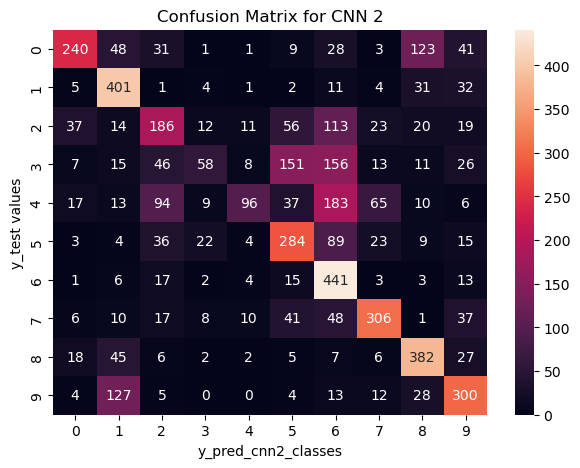

In [104]:
cm_cnn2 = confusion_matrix(y_test, y_pred_cnn2_classes)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_cnn2, annot=True, fmt='d')
plt.title('Confusion Matrix for CNN 2')
plt.xlabel('y_pred_cnn2_classes')
plt.ylabel('y_test values')
plt.show()